Plot C vs size of brain areas 

Copyright: G. J.-P. C. Becq, Gipsa-lab, UMR 5216, CNRS  
Date: 2019-05-07

This software is governed by the CeCILL-B license under French law and
abiding by the rules of distribution of free software.  You can  use, 
modify and/ or redistribute the software under the terms of the CeCILL-B 
license as circulated by CEA, CNRS and INRIA at the following URL
"http://www.cecill.info". 

As a counterpart to the access to the source code and  rights to copy,
modify and redistribute granted by the license, users are provided only
with a limited warranty  and the software's author,  the holder of the
economic rights,  and the successive licensors  have only  limited
liability. 

In this respect, the user's attention is drawn to the risks associated
with loading,  using,  modifying and/or developing or reproducing the
software by the user in light of its specific status of free software,
that may mean  that it is complicated to manipulate,  and  that  also
therefore means  that it is reserved for developers  and  experienced
professionals having in-depth computer knowledge. Users are therefore
encouraged to load and test the software's suitability as regards their
requirements in conditions enabling the security of their systems and/or 
data to be ensured and,  more generally, to use and operate it in the 
same conditions as regards security. 

The fact that you are presently reading this means that you have had
knowledge of the CeCILL-B license and that you accept its terms.

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
sys.path.append('../../src/Python/')

In [5]:
# import cerebrostat_graph
import igraph
import importlib as imp
import tools

In [6]:
import pandas as pd

In [7]:
df_area = pd.read_csv('../data/area.csv')
df_db = pd.read_csv('../data/trial.csv')
l_label_ret = tools.L_AREA
n_area = len(l_label_ret)
cond_1 = (df_area['LABEL'].isin(l_label_ret))
df_area_1 = df_area[cond_1]
val_name = df_area_1['WIDEAREA'].values
val_lr = df_area_1['X'].values
val_is = df_area_1['Y'].values
val_pa = df_area_1['Z'].values
val_n = df_area_1['VOLUME'].values
val_label = df_area_1['LABEL'].values

In [8]:
imp.reload(tools)

<module 'tools' from '/home/argheesh/Documents/code_articles/BecqNeuroscience/code/code/tools.py'>

In [9]:
n_rat = len(df_db.index) - 4
M_all = zeros((n_rat, n_area))
k_rat = -1
for i_rat in df_db.index: 
    print('.', end='')
    name = df_db.loc[i_rat, 'NAME']
    group = df_db.loc[i_rat, 'GROUP']
    if group == "DEAD": 
        continue
    else: 
        k_rat += 1
    fn = '../data/{1}/{0}_{1}.csv'.format(name, 'cD4')
    res = tools.get_C_no_mvt(df_db, name, fn, i=4)
    FCS = res[3]
    M_all[k_rat, :] = FCS
    
"""
list_i_group = [0, 1, 2, 3, 5]
k_rat = -1
n_rat = 34
M_all = zeros((n_rat, n_area))
class_group = zeros((n_rat, ), 'int')
name_rat = []
for i_group in list_i_group: 
    for i_rat in cerebrostat_graph.list_group_list_rat[i_group]:
        k_rat += 1
        name = cerebrostat_graph.df_trial['RES_NAME'][i_rat]
        group = cerebrostat_graph.list_group_name[i_group]
        class_group[k_rat-1] = int(i_group)
        name_rat.append(group + ' - ' + name)
        print(k_rat, i_rat, group, i_group, name)
        fn = '../../res/res_sig/lr3/' + name + '/' + name + '_s4.csv'
        (C, W, val, s_c) = tools.get_C_no_mvt(df_db, name, fn)
        M_all[k_rat, :] = W
"""

.....................

/home/argheesh/software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/argheesh/software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


.................

"\nlist_i_group = [0, 1, 2, 3, 5]\nk_rat = -1\nn_rat = 34\nM_all = zeros((n_rat, n_area))\nclass_group = zeros((n_rat, ), 'int')\nname_rat = []\nfor i_group in list_i_group: \n    for i_rat in cerebrostat_graph.list_group_list_rat[i_group]:\n        k_rat += 1\n        name = cerebrostat_graph.df_trial['RES_NAME'][i_rat]\n        group = cerebrostat_graph.list_group_name[i_group]\n        class_group[k_rat-1] = int(i_group)\n        name_rat.append(group + ' - ' + name)\n        print(k_rat, i_rat, group, i_group, name)\n        fn = '../../res/res_sig/lr3/' + name + '/' + name + '_s4.csv'\n        (C, W, val, s_c) = tools.get_C_no_mvt(df_db, name, fn)\n        M_all[k_rat, :] = W\n"

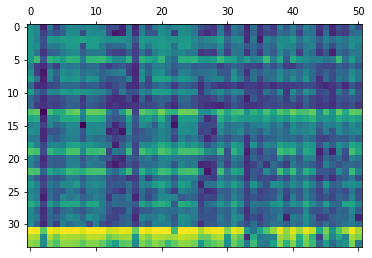

In [10]:
matshow(M_all)

In [11]:
M = np.mean(M_all, 0)
S = np.std(M_all, 0)

In [12]:
#plot(val_n, M, '.')
print(val_label)

['ACC' 'Ins_r' 'APir_r' 'AU_r' 'Ent_r' 'Par_r' 'M1_r' 'M2_r' 'RSC_r'
 'S1_r' 'S1BF_r' 'S2_r' 'TeA_r' 'V1_r' 'V2_r' 'Ins_l' 'APir_l' 'AU_l'
 'Ent_l' 'Par_l' 'M1_l' 'M2_l' 'RSC_l' 'S1_l' 'S1BF_l' 'S2_l' 'TeA_l'
 'V1_l' 'V2_l' 'CPu_r' 'BG_r' 'Th_r' 'Sep_r' 'H_r' 'DSC_r' 'pag_r' 'BF_r'
 'PT_r' 'HIP_r' 'S_r' 'CPu_l' 'BG_l' 'Th_l' 'Sep_l' 'H_l' 'DSC_l' 'pag_l'
 'BF_l' 'PT_l' 'HIP_l' 'S_l']


In [11]:
for i in range(n_area): 
    print(str(val_n[i]) + ' - ' + str(val_label[i]))

32.55859375 - ACC
19.55859375 - Ins_r
6.5185546875 - APir_r
17.6943359375 - AU_r
35.4013671875 - Ent_r
8.900390625 - Par_r
21.6669921875 - M1_r
12.0380859375 - M2_r
15.3798828125 - RSC_r
41.46484375 - S1_r
18.3857421875 - S1BF_r
4.796875 - S2_r
3.2255859375 - TeA_r
18.1044921875 - V1_r
8.423828125 - V2_r
19.55859375 - Ins_l
6.5185546875 - APir_l
17.6943359375 - AU_l
35.4013671875 - Ent_l
8.900390625 - Par_l
21.6669921875 - M1_l
12.0380859375 - M2_l
15.3798828125 - RSC_l
41.46484375 - S1_l
18.3857421875 - S1BF_l
4.796875 - S2_l
3.2255859375 - TeA_l
18.1044921875 - V1_l
8.423828125 - V2_l
44.83984375 - CPu_r
6.626953125 - BG_r
33.947265625 - Th_r
4.78515625 - Sep_r
6.6982421875 - H_r
12.419921875 - DSC_r
6.3857421875 - pag_r
30.7158203125 - BF_r
3.4287109375 - PT_r
37.224609375 - HIP_r
11.3603515625 - S_r
44.83984375 - CPu_l
6.626953125 - BG_l
33.947265625 - Th_l
4.78515625 - Sep_l
6.6982421875 - H_l
12.419921875 - DSC_l
6.3857421875 - pag_l
30.7158203125 - BF_l
3.4287109375 - PT_l
37.22

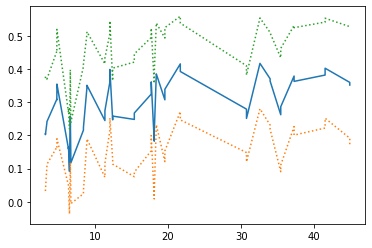

In [13]:
a_s_val_n = np.argsort(val_n)
plot(val_n[a_s_val_n], M[a_s_val_n], '-')
plot(val_n[a_s_val_n], M[a_s_val_n] - S[a_s_val_n], ':')
plot(val_n[a_s_val_n], M[a_s_val_n] + S[a_s_val_n], ':')

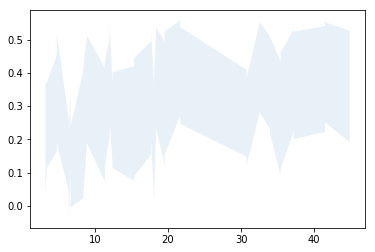

In [13]:
fill_between(val_n[a_s_val_n], M[a_s_val_n] - S[a_s_val_n], M[a_s_val_n] + S[a_s_val_n], alpha=0.1)

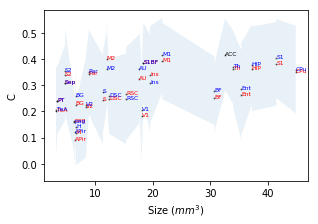

In [15]:
# figure(figsize=(15/2.54, 10/2.54))
figure(figsize=(12/2.54, 8/2.54))
fill_between(val_n[a_s_val_n], M[a_s_val_n] - S[a_s_val_n], M[a_s_val_n] + S[a_s_val_n], alpha=0.1)
for i in range(n_area): 
    if all(val_label[i][-2:] == '_r'): 
        plot(val_n[i], M[i], 'ok', markersize=1, alpha=0.5)
        #text(val_n[i], M[i], val_label[i][:-2], fontsize=10)
        text(val_n[i], M[i], val_label[i][:-2], color='r', fontsize=6)
    elif all(val_label[i]=='ACC'): 
        plot(val_n[i], M[i], 'ok', markersize=1, alpha=0.5)
        text(val_n[i], M[i], val_label[i], fontsize=6)
    else :
        plot(val_n[i], M[i], 'ok', markersize=1, alpha=0.5)
        text(val_n[i], M[i], val_label[i][:-2], color='b', fontsize=6)
#xticks(arange(0, 25000, 10000))
xlabel('Size ($mm^3$)')
ylabel('C')
tools.mysavefig('../fig/no_mvt_C_versus_size')

In [58]:
l_area = df_area.LABEL.tolist()[1:52]
print(l_area)
l_area_2 = []
l_area_2.append(l_area[0])
for i in range(1, 51): 
    l_area_2.append(l_area[i][:-2])
l_area_3 = []
l_area_3.append(l_area_2[0])
for i in range(1, 15): 
    l_area_3.append(l_area_2[i])
for i in range(29, 40): 
    l_area_3.append(l_area_2[i])
print(l_area_2)
print(l_area_3)

['ACC', 'Ins_r', 'APir_r', 'AU_r', 'Ent_r', 'Par_r', 'M1_r', 'M2_r', 'RSC_r', 'S1_r', 'S1BF_r', 'S2_r', 'TeA_r', 'V1_r', 'V2_r', 'Ins_l', 'APir_l', 'AU_l', 'Ent_l', 'Par_l', 'M1_l', 'M2_l', 'RSC_l', 'S1_l', 'S1BF_l', 'S2_l', 'TeA_l', 'V1_l', 'V2_l', 'CPu_r', 'BG_r', 'Th_r', 'Sep_r', 'H_r', 'DSC_r', 'pag_r', 'BF_r', 'PT_r', 'HIP_r', 'S_r', 'CPu_l', 'BG_l', 'Th_l', 'Sep_l', 'H_l', 'DSC_l', 'pag_l', 'BF_l', 'PT_l', 'HIP_l', 'S_l']
['ACC', 'Ins', 'APir', 'AU', 'Ent', 'Par', 'M1', 'M2', 'RSC', 'S1', 'S1BF', 'S2', 'TeA', 'V1', 'V2', 'Ins', 'APir', 'AU', 'Ent', 'Par', 'M1', 'M2', 'RSC', 'S1', 'S1BF', 'S2', 'TeA', 'V1', 'V2', 'CPu', 'BG', 'Th', 'Sep', 'H', 'DSC', 'pag', 'BF', 'PT', 'HIP', 'S', 'CPu', 'BG', 'Th', 'Sep', 'H', 'DSC', 'pag', 'BF', 'PT', 'HIP', 'S']
['ACC', 'Ins', 'APir', 'AU', 'Ent', 'Par', 'M1', 'M2', 'RSC', 'S1', 'S1BF', 'S2', 'TeA', 'V1', 'V2', 'CPu', 'BG', 'Th', 'Sep', 'H', 'DSC', 'pag', 'BF', 'PT', 'HIP', 'S']


In [25]:
k_rat = -1
n_rat = 34
n_area_2 = 26
M_all = zeros((n_rat, n_area_2))
class_group = zeros((n_rat, ), 'int')
name_rat = []
for i_rat in df_db.index: 
    name = df_db.loc[i_rat, 'NAME']
    group = df_db.loc[i_rat, 'GROUP']
    if group == 'DEAD': 
        continue
    k_rat += 1
    i_group = tools.L_GROUP.index(group)
    class_group[k_rat-1] = int(i_group)
    name_rat.append(group + ' - ' + name)
    print(k_rat, i_rat, group, i_group, name)
    fn = '../data/{1}/{0}_{1}.csv'.format(name, 'cD4')
    res = tools.get_C_no_mvt(df_db, name, fn, i=4)
    FCS = res[3]
    FCS[1:15] = (FCS[1:15] + FCS[15:29]) / 2
    FCS[15:26] = (FCS[29:40] + FCS[40:51]) / 2
    M_all[k_rat, :] = FCS[:26]

0 0 ISO_W 2 20160324_133310
1 1 ISO_W 2 20160325_101125
2 2 URE_L 4 20160419_095544
3 3 URE_L 4 20160420_101945
4 4 ISO_W 2 20160421_133725
5 5 URE_L 4 20160421_093700
6 6 MED_L 3 20160524_102250
7 7 MED_L 3 20160524_131800
8 9 MED_L 3 20160525_120830
9 10 MED_L 3 20160525_142944
10 11 MED_L 3 20160525_100645
11 12 MED_L 3 20160609_095855
12 13 MED_L 3 20160609_120340
13 14 URE_L 4 20160609_141010
14 16 URE_L 4 20160610_095040
15 18 URE_L 4 20160610_132250
16 19 URE_L 4 20160610_151330
17 20 ISO_L 1 20160613_105856


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18 21 ISO_L 1 20160613_135835
19 22 ISO_W 2 20160614_095825
20 23 ISO_W 2 20160615_103000
21 24 ISO_W 2 20160615_121820
22 25 ISO_W 2 20160615_140855
23 26 ISO_L 1 20160615_160725
24 27 ETO_L 0 20160616_103405
25 28 ETO_L 0 20160616_125755
26 29 ETO_L 0 20160616_145220
27 30 ETO_L 0 20160616_164200
28 31 ETO_L 0 20160617_121650
29 32 ETO_L 0 20160617_135425
30 33 ETO_L 0 20160617_154245
31 35 ISO_L 1 20160629_093021
32 36 ISO_L 1 20160629_111310
33 37 ISO_L 1 20160629_143411


(34, 26)

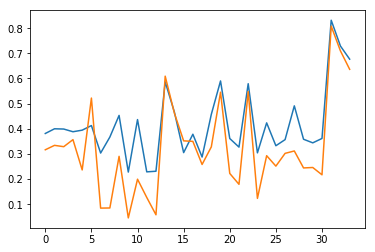

In [38]:
plot(M_all[:, 0])
plot(M_all[:, 1])

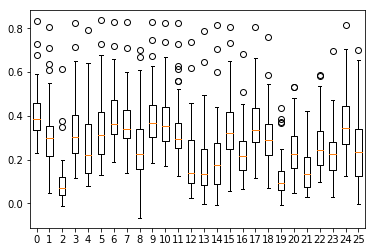

In [18]:
boxplot(M_all, positions=arange(26)); 

In [19]:
weights = zeros((26, ))

In [20]:
weights[0] = df_area.VOLUME[1]
weights[1:15] = (df_area.VOLUME[2:16].values + df_area.VOLUME[16:30].values) / 2
weights[15:] = (df_area.VOLUME[30:41].values + df_area.VOLUME[41:52].values) / 2

In [53]:
print(df_area)
print(weights)

     LABEL         X         Y         Z       VOLUME WIDEAREA HEMISPHERE  \
0        0  0.000000 -4.615860 -4.458660  3356.615234      NaN        NaN   
1      ACC  0.000000 -1.866189  1.189277    32.558594      acc        acc   
2    Ins_r  5.081834 -5.657519  1.052388    19.558594      cor          r   
3   APir_r  5.670714 -8.682437 -4.320484     6.518555      cor          r   
4     AU_r  6.561766 -4.028116 -4.475524    17.694336      cor          r   
5    Ent_r  5.904208 -5.993763 -6.498606    35.401367      cor          r   
6    Par_r  3.789843 -1.058495 -3.887552     8.900391      cor          r   
7     M1_r  2.495216 -1.330524  1.165471    21.666992      cor          r   
8     M2_r  1.498505 -1.302790  2.219149    12.038086      cor          r   
9    RSC_r  1.274395 -1.236882 -5.430071    15.379883      cor          r   
10    S1_r  4.522041 -2.452765  0.038648    41.464844      cor          r   
11  S1BF_r  5.351368 -2.455086 -1.990861    18.385742      cor          r   

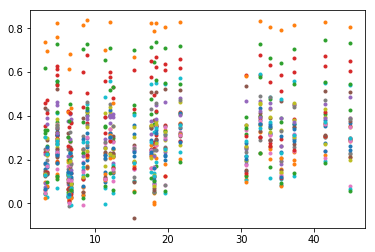

In [21]:
for i in range(34): 
    plot(weights, M_all[i], '.')

In [22]:
r_mm = 0.125 * 0.125 * 0.125
print(r_mm)

0.001953125


In [23]:
l_area_3

['ACC',
 'A',
 'Ins',
 'APir',
 'AU',
 'Ent',
 'Par',
 'M1',
 'M2',
 'RSC',
 'S1',
 'S1BF',
 'S2',
 'TeA',
 'V1',
 'V2',
 'CPu',
 'BG',
 'Th',
 'Sep',
 'H',
 'DSC',
 'pag',
 'BF',
 'PT',
 'HIP']

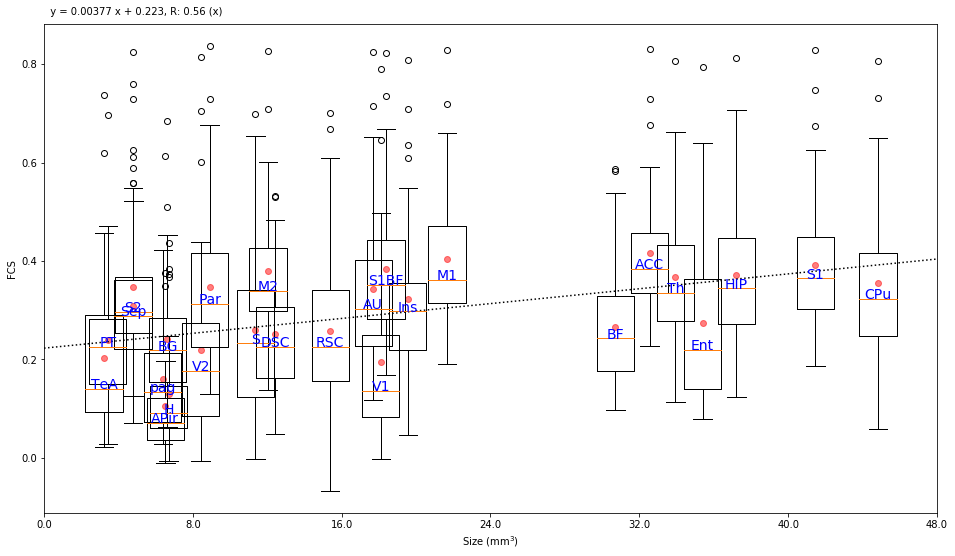

In [59]:
imp.reload(tools)
figure(figsize=(16, 9))
(I, J) = where(M_all < -0.25)
M_all[I, J] = -0.25
boxplot(M_all, widths=2, positions=weights, labels=['']*26); 
mean_all = mean(M_all, 0)
scatter(weights, mean_all, color='r', alpha=0.5)
tools.plot_lr(weights, mean_all, ax=gca(), x_reg_1=0, x_reg_2=48.1, y_loc=0.9, mod=6, s_1='  ')
for i in range(26): 
    color_i = 'b' # (0.25 + 0.5 * i / 26, 0.75 - 0.5 * i / 26, 0.75 - 0.5 * i / 26)
    text(weights[i], median(M_all[:, i], 0), l_area_3[i], rotation=0, color=color_i, fontsize=14, 
        horizontalalignment='center')
#plot(weights[[15, 18]], [-0.25, -0.25], 's', mec='k', mfc='w')
#axis(xmin=0, xmax=48.1, ymax=1, ymin=-0.25)
xticks(arange(0, 48.1, 8), arange(0, 48.1, 8)); 
xlabel('Size (mm$^3$)')
ylabel('FCS')
tools.mysavefig('../fig/no_mvt_boxplot_c_versus_size')

In [69]:
print(df_area[['LABEL', 'VOLUME']])

     LABEL       VOLUME
0        0  3356.615234
1      ACC    32.558594
2    Ins_r    19.558594
3   APir_r     6.518555
4     AU_r    17.694336
5    Ent_r    35.401367
6    Par_r     8.900391
7     M1_r    21.666992
8     M2_r    12.038086
9    RSC_r    15.379883
10    S1_r    41.464844
11  S1BF_r    18.385742
12    S2_r     4.796875
13   TeA_r     3.225586
14    V1_r    18.104492
15    V2_r     8.423828
16   Ins_l    19.558594
17  APir_l     6.518555
18    AU_l    17.694336
19   Ent_l    35.401367
20   Par_l     8.900391
21    M1_l    21.666992
22    M2_l    12.038086
23   RSC_l    15.379883
24    S1_l    41.464844
25  S1BF_l    18.385742
26    S2_l     4.796875
27   TeA_l     3.225586
28    V1_l    18.104492
29    V2_l     8.423828
30   CPu_r    44.839844
31    BG_r     6.626953
32    Th_r    33.947266
33   Sep_r     4.785156
34     H_r     6.698242
35   DSC_r    12.419922
36   pag_r     6.385742
37    BF_r    30.715820
38    PT_r     3.428711
39   HIP_r    37.224609
40     S_r    11

In [37]:
0.2 + 1 * 0.004

0.20400000000000001